In this notebook you will learn about 3 packages used for visualization of data in Python: [matplotlib](https://matplotlib.org/),
[seaborn](https://seaborn.pydata.org/) and [gpplot](https://gpplot.readthedocs.io/en/latest/). gpplot is a package
developed and maintained by the R&D group.

To use these visualization packages in your notebook, import them as shown below:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
import pandas as pd

`pyplot` is a module in matplotlib with a collection of functions to plot data and make specific changes to a figure.
We also imported pandas here to be able to read and process data.

We will now set the aesthetics such as default color palette, font, and font size for the plots in this notebook using
gpplot defaults:

In [2]:
gpp.set_aesthetics()

## Scatter plots using matplotlib, seaborn and gpplot
We will now generate a scatter plot using pyplot to compare the log-fold changes of Replicate A and Replicate B.

In [3]:
lfc = pd.read_csv('Data/sample_data_log_fold_changes.csv')
lfc.head()

,sgRNA Sequence,A375_RepA,A375_RepB
0,AAAAAAAATCCGGACAATGG,-0.818831,-0.671000
1,AAAAAAAGGATGGTGATCAA,0.163102,0.148894
2,AAAAAAATGACATTACTGCA,-1.500766,-0.844622
3,AAAAAAATGTCAGTCGAGTG,0.457721,0.043161
4,AAAAAACACAAGCAAGACCG,-0.120172,-0.860161


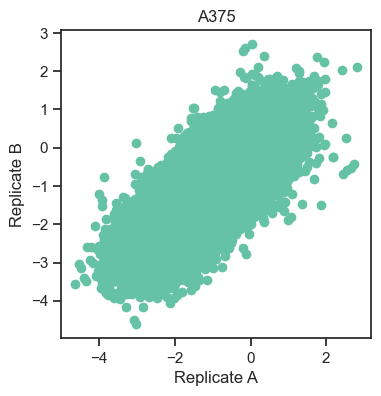

In [4]:
fig,ax = plt.subplots(figsize=(4,4))
ax = plt.scatter(x=lfc["A375_RepA"],y=lfc["A375_RepB"])
t = plt.xlabel("Replicate A")
t = plt.ylabel("Replicate B")
t = plt.title("A375")

In the above chunk of code, we first use the `subplots` function from `pyplot` to create a figure of size 4inx4in. We then
plot the scatter using the `scatter` function from `pyplot`. We then use `pyplot` functions to label the x-axis and y-axis
and give a title to the figure.

We can generate the same scatter plot using the seaborn package as follows:

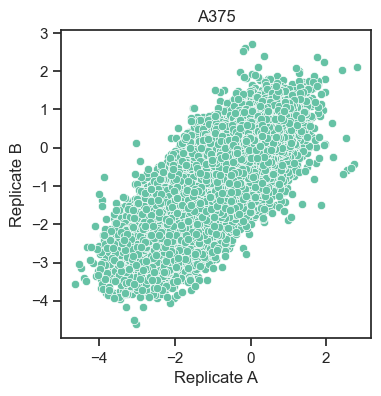

In [5]:
fig,ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='A375_RepA', y='A375_RepB', data=lfc)
t = plt.xlabel("Replicate A")
t = plt.ylabel("Replicate B")
t = plt.title("A375")

We used functions from `matplotlib` to create the figure, label the axes and give a title but used the `scatterplot`
function from `seaborn` to generate the scatter plot.

This data can also be represented as a density plot using the gpplot package. We will also add the Pearson correlation
value to this plot and an x=y line. We will also remove the right and top border of the figure

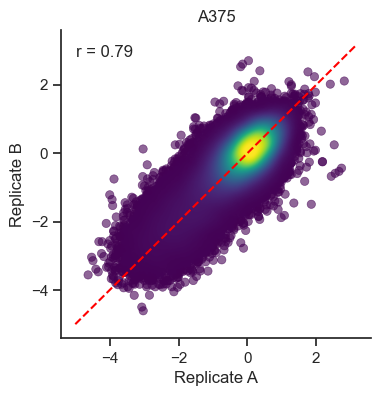

In [6]:
fig,ax = plt.subplots(figsize=(4,4))
ax = gpp.point_densityplot(data=lfc, x='A375_RepA', y='A375_RepB')
ax = gpp.add_correlation(data=lfc, x='A375_RepA', y='A375_RepB')
ax = gpp.add_xy_line(linecolor='red')
t = plt.xlabel("Replicate A")
t = plt.ylabel("Replicate B")
t = plt.title("A375")
sns.despine()

In the above plot, we used all three packages. `matplotlib` to create the figure, label the axes and give a
title, `gpplot` to create the density plot, add the correlation value and draw the x=y line and `seaborn` to remove the
borders.

## Ridgeplot to visualize distribution of guides

We can also use these packages to look at the distribution of non-targeting control guides and control guides targeting
one intergenic region using a `ridgeplot`. We first annotate the guide sequences with the gene they target, then calculate the average
log-fold change of the replicates and assign a category to each guide based on their target.
The guides that do not target anywhere in the genome are classified as "Non-targeting control", guides that target a
single intergenic site are classified as "Intergenic control" and all other guides are classified as "Other".

In [9]:
guide_annotations = pd.read_csv('Data/sample_dataset_gene_annotations.csv')

In [10]:
annotated_df = pd.merge(guide_annotations, lfc, on='sgRNA Sequence')
annotated_df['Average_LFC'] = annotated_df[['A375_RepA','A375_RepB']].mean(axis=1)

In [11]:
category = []
for i,r in annotated_df.iterrows():
    if 'NO_SITE' in r['Gene Symbol']:
        category.append('Non-targeting control')
    elif 'ONE_INTERGENIC' in r['Gene Symbol']:
        category.append('Intergenic control')
    else:
        category.append('Other')
annotated_df['Category'] = category

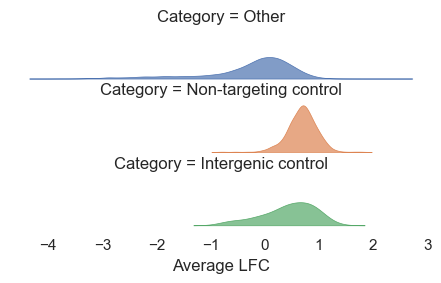

In [36]:
#Make a Ridge Plot 

# Change background to be transparent and set style to white
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize a facetgrid
g = sns.FacetGrid(annotated_df, row='Category', hue='Category', aspect=5, height=1)
# Draw the densities in a few steps
g.map(sns.kdeplot, 'Average_LFC', clip_on=False, fill=True, alpha=0.7, lw=0.5)
# Label axes with the values from hue
#ax = plt.gca()
#ax.text(0, 0.2, "Average_LFC",  ha="left", va="left", transform=ax.transAxes)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0.5)
g.set(yticks=[],xlabel="",ylabel="")
g.despine(bottom=True, left=True)
t = plt.xlabel('Average LFC')

The [seaborn gallery](https://seaborn.pydata.org/examples/index.html) and the [gpplot](https://gpplot.readthedocs.io/en/latest/)
documentation are good resources to explore different kinds of plots.
